In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

In [7]:
print(fandango.head(5))
print()
print()
print(fandango.info())
print()
print()
print(fandango.describe())

                          FILM  STARS  RATING  VOTES
0  Fifty Shades of Grey (2015)    4.0     3.9  34846
1        Jurassic World (2015)    4.5     4.5  34390
2       American Sniper (2015)    5.0     4.8  34085
3             Furious 7 (2015)    5.0     4.8  33538
4            Inside Out (2015)    4.5     4.5  15749


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB
None


            STARS      RATING         VOTES
count  504.000000  504.000000    504.000000
mean     3.558532    3.375794   1147.863095
std      1.563133    1.491223   3830.583136
min      0.000000    0.000000      0.000000
25%      3.500000    3.100000      3.000000
50%      4.000000   

Text(0.5, 1.0, 'Связь между популярностью фильма и его рейтингом')

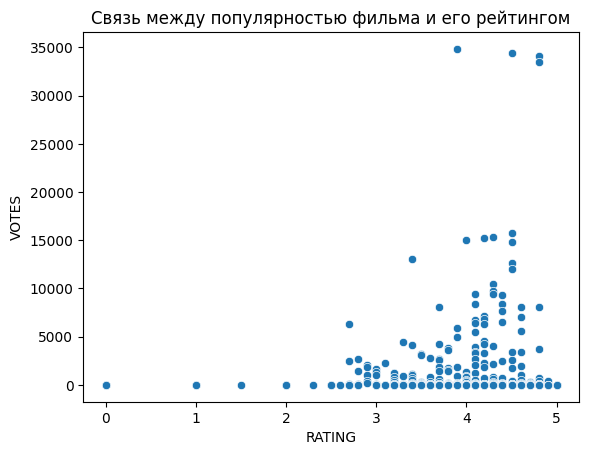

In [10]:
sns.scatterplot(data=fandango, x='RATING', y='VOTES')
plt.title('Связь между популярностью фильма и его рейтингом')

In [12]:
fandango.corr()

<ipython-input-12-b65df3b6d08c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fandango.corr()


,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [13]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [16]:
# создадим новую колонку YEAR, для этого из колонки FILM вытащим значение года

fandango['YEAR'] = fandango['FILM'].apply(lambda row: row[-5:-1])

In [19]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

Text(0.5, 1.0, 'Количество фильмов в год')

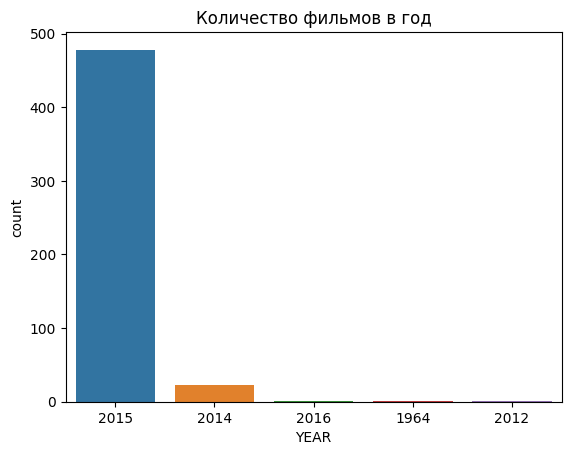

In [23]:
# количество фильмов в год

sns.countplot(data=fandango, x='YEAR')
plt.title('Количество фильмов в год')

In [28]:
# 10 фильмов, получившие наибольшее количество голосов (votes)

fandango.sort_values('VOTES',ascending=False)[:10]

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [31]:
# Сколько фильмов имеет нулевое количество голосов (votes)?

len(fandango[fandango['VOTES'] == 0])

69

In [36]:
# датафрейм только с теми фильмами, которые имеют голоса (votes)

fandango_votes = fandango[fandango['VOTES'] > 0]
fandango_votes

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


<ipython-input-51-d849de888566>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=fandango_votes, x='RATING', clip=[0,5],shade=True, label='True rating')
<ipython-input-51-d849de888566>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=fandango_votes, x='STARS', clip=[0,5],shade=True, label='Stars displayed')


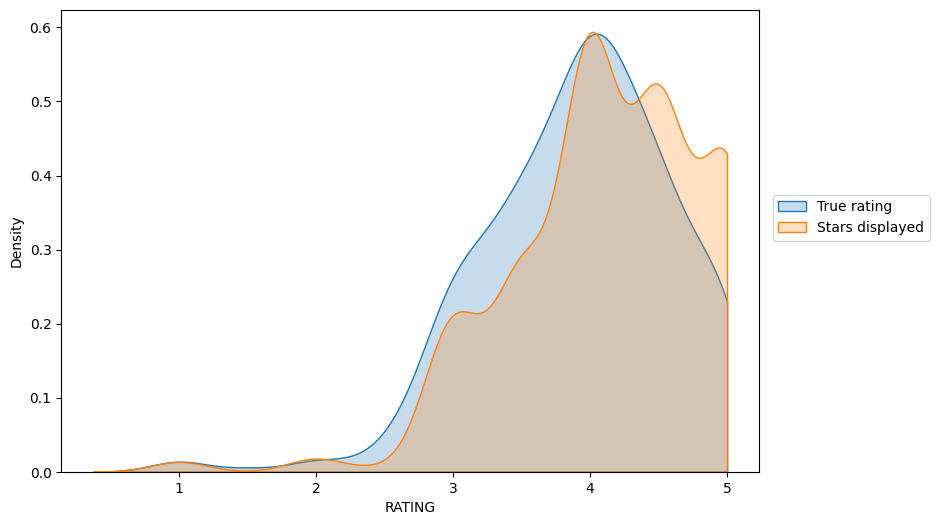

In [51]:
# распределение отображаемых рейтингов (STARS) и истинных рейтингов на основе голосов пользователей (RATING)
plt.figure(figsize = (9,6))
sns.kdeplot(data=fandango_votes, x='RATING', clip=[0,5],shade=True, label='True rating')
sns.kdeplot(data=fandango_votes, x='STARS', clip=[0,5],shade=True, label='Stars displayed')
plt.legend(loc=(1.02,0.5))

In [55]:
# Создайте новую колонку, в которой сохраните разницу между колонками STARS и RATING

fandango_votes['STARS_DIFF'] = round((fandango_votes['STARS'] - fandango_votes['RATING']),1)

fandango_votes.head()

<ipython-input-55-3530f089f2e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango_votes['STARS_DIFF'] = round((fandango_votes['STARS'] - fandango_votes['RATING']),1)


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


<Axes: xlabel='STARS_DIFF', ylabel='count'>

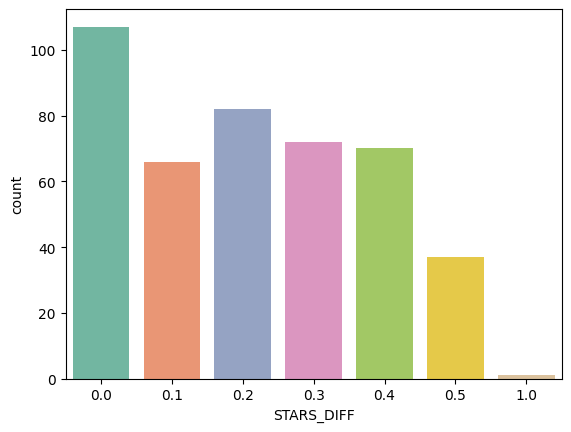

In [57]:
# сколько раз встречается то или иное значение разницы между STAR и RATING

sns.countplot(data=fandango_votes, x='STARS_DIFF',palette='Set2')

In [58]:
# один из фильмов имеет разницу в 1 звезду между отображаемым рейтингом и истинным рейтингом

fandango_votes[fandango_votes['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


Часть 3: Сравнение рейтингов Fandango с рейтингами других компаний

In [60]:
# загрузим ДФ с рейтингами других компаний

all_sites = pd.read_csv("all_sites_scores.csv")

all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [61]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [62]:
all_sites.describe()


,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


<Axes: xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

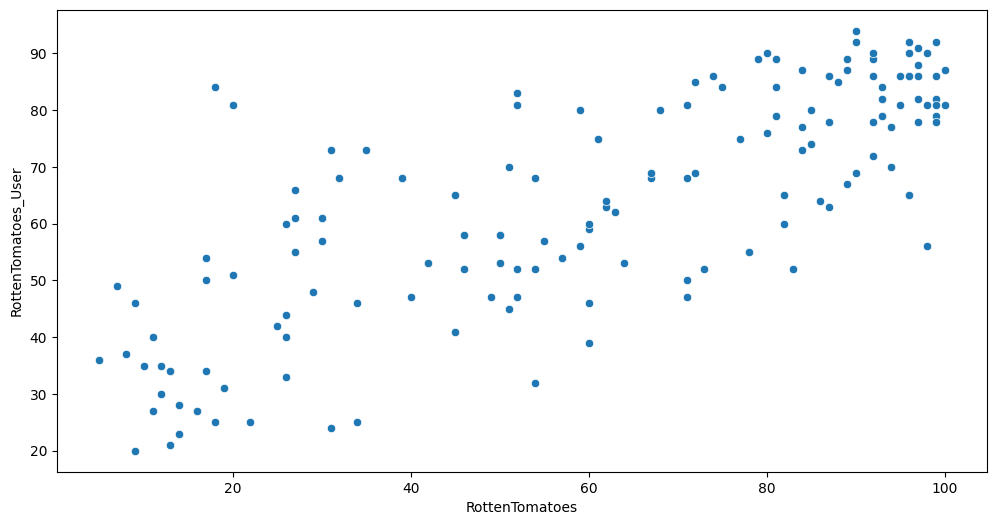

In [68]:
#  Rotten Tomatoes: связь между рейтингами от критиков и пользовательскими рейтингами

plt.figure(figsize=(12,6))
sns.scatterplot(data=all_sites, x='RottenTomatoes', y='RottenTomatoes_User')

In [69]:
all_sites.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count'],
      dtype='object')

In [70]:
# Создайте новую колонку, в которой сохраните разницу между рейтингом от критиков и пользовательским рейтингом для Rotten Tomatoes

all_sites['Rotten_DIFF'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [72]:
# средняя абсолютная разница между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes

abs(all_sites['Rotten_DIFF']).mean()

15.095890410958905

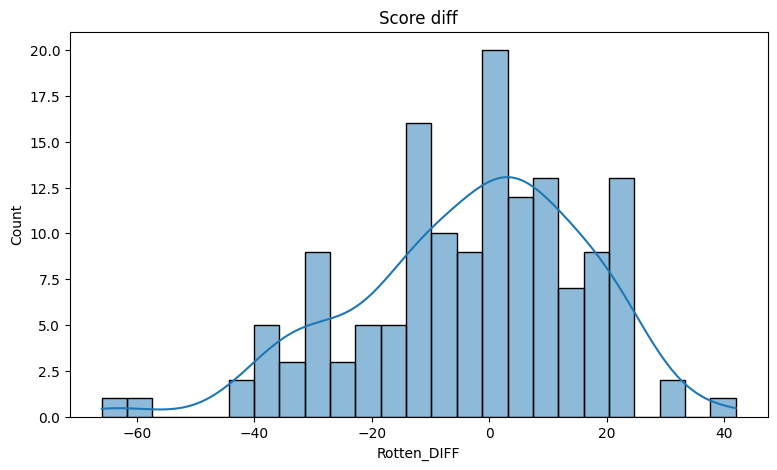

In [89]:
# график распределения разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes

plt.figure(figsize=(9,5))
sns.histplot(data=all_sites, x='Rotten_DIFF', bins=25, kde=True)
plt.title('Score diff')


plt.show()

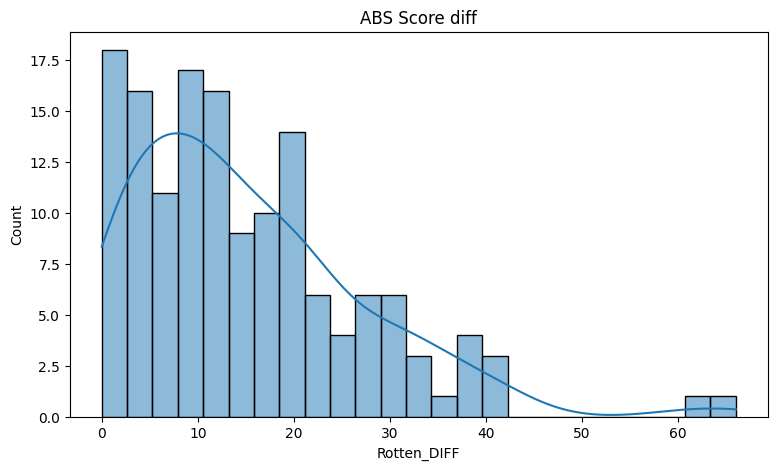

In [92]:
 # график распределения абсолютных значений разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes

plt.figure(figsize=(9,5))
sns.histplot(data=all_sites, x=abs(all_sites['Rotten_DIFF']), bins=25, kde=True)
plt.title('ABS Score diff')

plt.show()

In [107]:
# 5 фильмов в среднем были выше всего оценены пользователями, по сравнению с оценками от критиков

all_sites[['FILM','Rotten_DIFF']].sort_values('Rotten_DIFF')[0:5]

,FILM,Rotten_DIFF
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


In [106]:
# 5 фильмов, которые в среднем были выше всего оценены критиками, по сравнению с оценками от пользователей

all_sites[['FILM','Rotten_DIFF']].sort_values('Rotten_DIFF',ascending=False)[0:5]

,FILM,Rotten_DIFF
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


(0.0, 10.0)

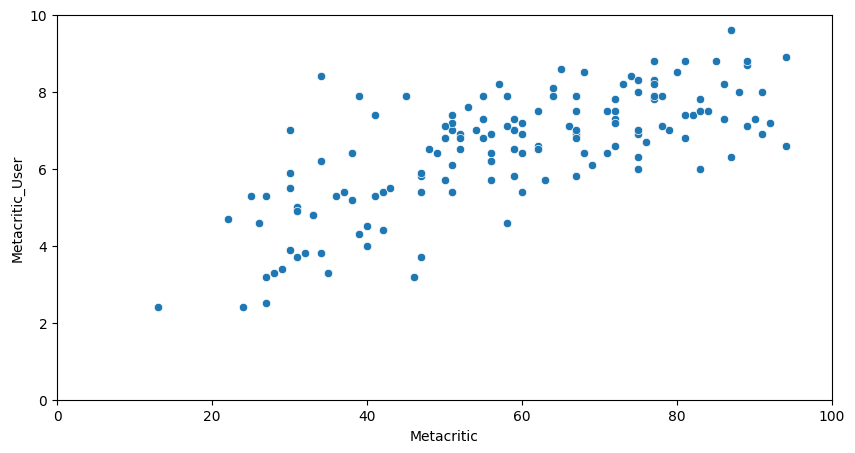

In [116]:
# график scatterplot для сравнения рейтингов Metacritic и Metacritic User

plt.figure(figsize=(10,5))
sns.scatterplot(data=all_sites, x='Metacritic',y='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10)

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

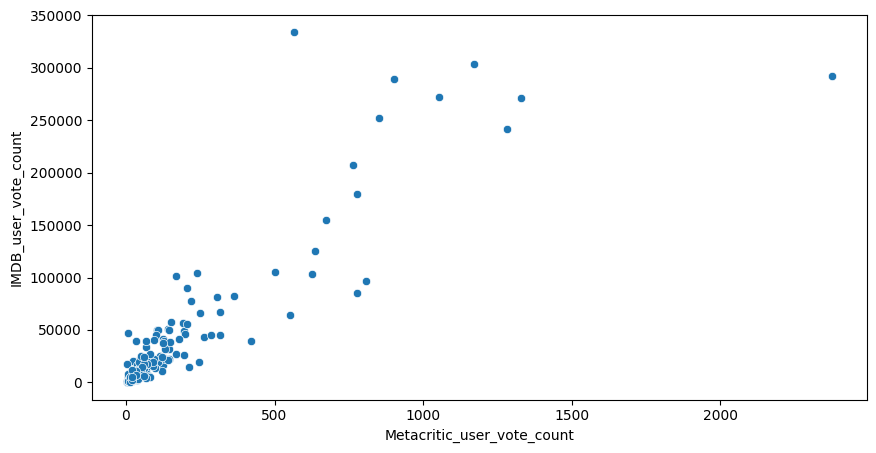

In [119]:
# график scatterplot для изображения связи между количеством голосов на MetaCritic и количеством голосов на IMDB.

plt.figure(figsize=(10,5))
sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

In [121]:
# Какой фильм получил наибольшее количество голосов на IMDB?

all_sites.sort_values('IMDB_user_vote_count',ascending=False)[0:1]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_DIFF
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [122]:
# Какой фильм получил наибольшее количество голосов на Metacritic?

all_sites.sort_values('Metacritic_user_vote_count',ascending=False)[0:1]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_DIFF
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


In [125]:
union_df = fandango.merge(all_sites,how='inner', on='FILM')

In [127]:
union_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_DIFF                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [126]:
union_df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


In [129]:
# Добавьте дополнительные колонки в all_sites, и запишите в них нормализованные значения рейтингов от 0 до 5

union_df['RT_norm'] = round((union_df['RottenTomatoes'] / 20), 1)
union_df['RTU_norm'] = round((union_df['RottenTomatoes_User'] / 20), 1)

union_df['M_norm'] = round((union_df['Metacritic'] / 20), 1)
union_df['MU_norm'] = round((union_df['Metacritic_User'] / 2), 1)

union_df['IMDB_norm'] = round((union_df['IMDB'] / 2), 1)

union_df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_DIFF,RT_norm,RTU_norm,M_norm,MU_norm,IMDB_norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [130]:
union_df.columns


Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Rotten_DIFF',
       'RT_norm', 'RTU_norm', 'M_norm', 'MU_norm', 'IMDB_norm'],
      dtype='object')

In [132]:
# DataFrame с названием norm_scores, в котором оставьте только нормализованные рейтинги. Также оставьте колонки STARS и RATING из исходной таблицы fandango

norm_scores = union_df[['STARS','RATING','RT_norm','RTU_norm','M_norm', 'MU_norm', 'IMDB_norm']]

norm_scores.head()

,STARS,RATING,RT_norm,RTU_norm,M_norm,MU_norm,IMDB_norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


<ipython-input-159-88049e9d21a3>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=norm_scores,x=i,shade=True, label=i, clip=[0,5])
<ipython-input-159-88049e9d21a3>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=norm_scores,x=i,shade=True, label=i, clip=[0,5])
<ipython-input-159-88049e9d21a3>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=norm_scores,x=i,shade=True, label=i, clip=[0,5])
<ipython-input-159-88049e9d21a3>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=norm_scor

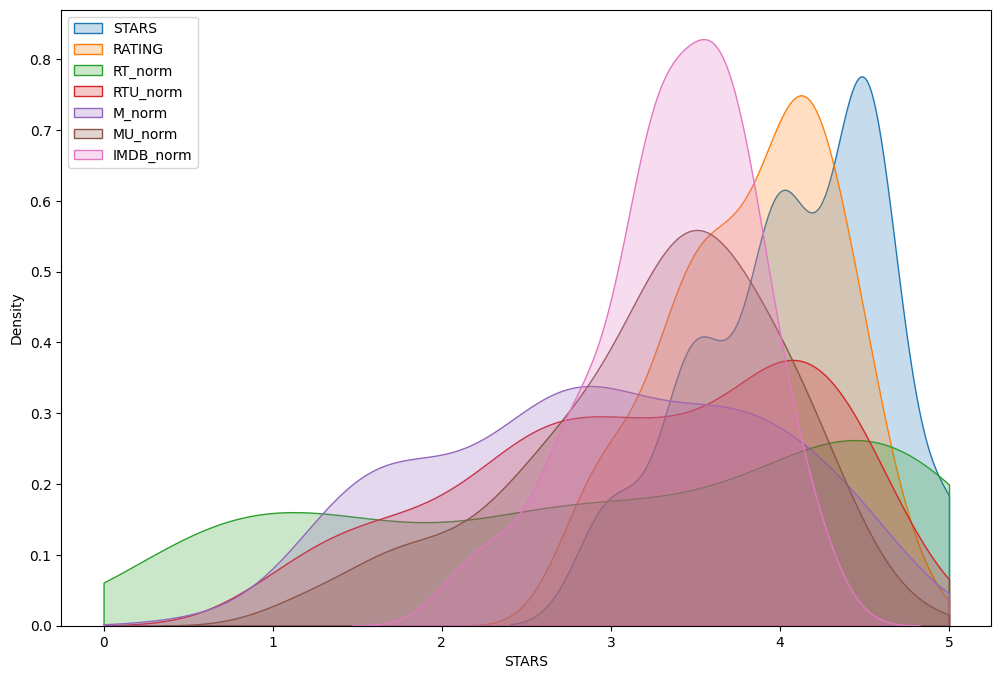

In [159]:
plt.figure(figsize=(12,8))
for i in norm_scores.columns:
  sns.kdeplot(data=norm_scores,x=i,shade=True, label=i, clip=[0,5])

plt.legend(loc=('upper left'))

<ipython-input-161-f38028f3b3ef>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=norm_scores,x='STARS',shade=True, label='STARS', clip=[0,5])
<ipython-input-161-f38028f3b3ef>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=norm_scores,x='RT_norm',shade=True, label='RT_norm', clip=[0,5])


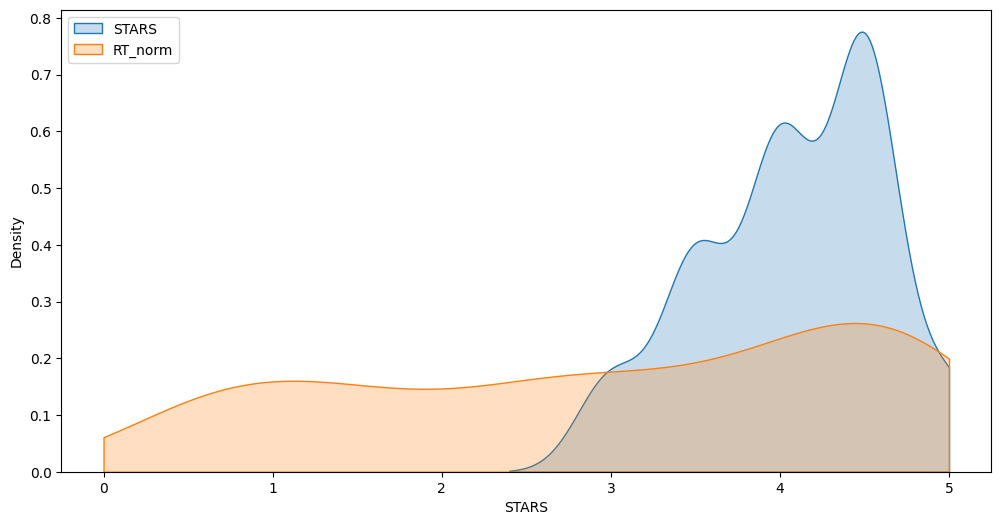

In [161]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=norm_scores,x='STARS',shade=True, label='STARS', clip=[0,5])
sns.kdeplot(data=norm_scores,x='RT_norm',shade=True, label='RT_norm', clip=[0,5])
plt.legend(loc='upper left')

<Axes: ylabel='Count'>

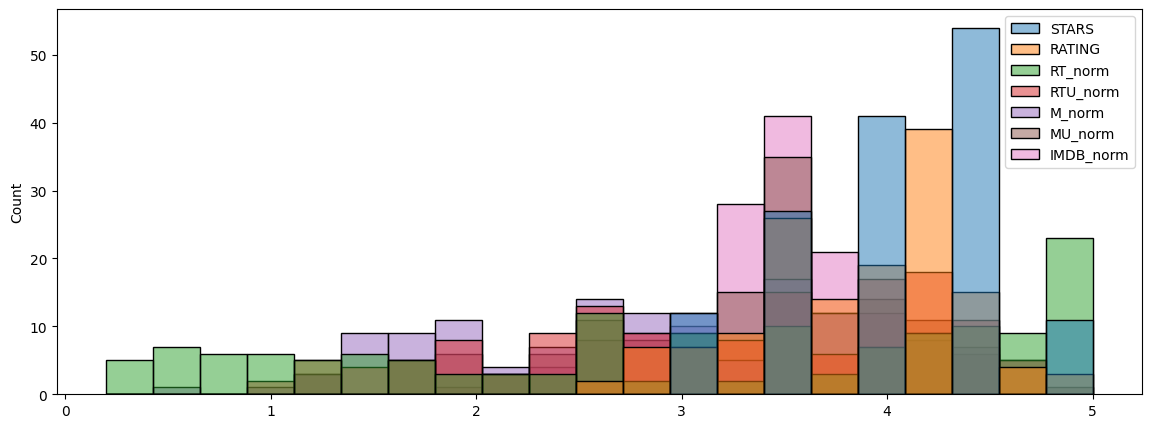

In [165]:
plt.figure(figsize=(14,5))
sns.histplot(data=norm_scores)

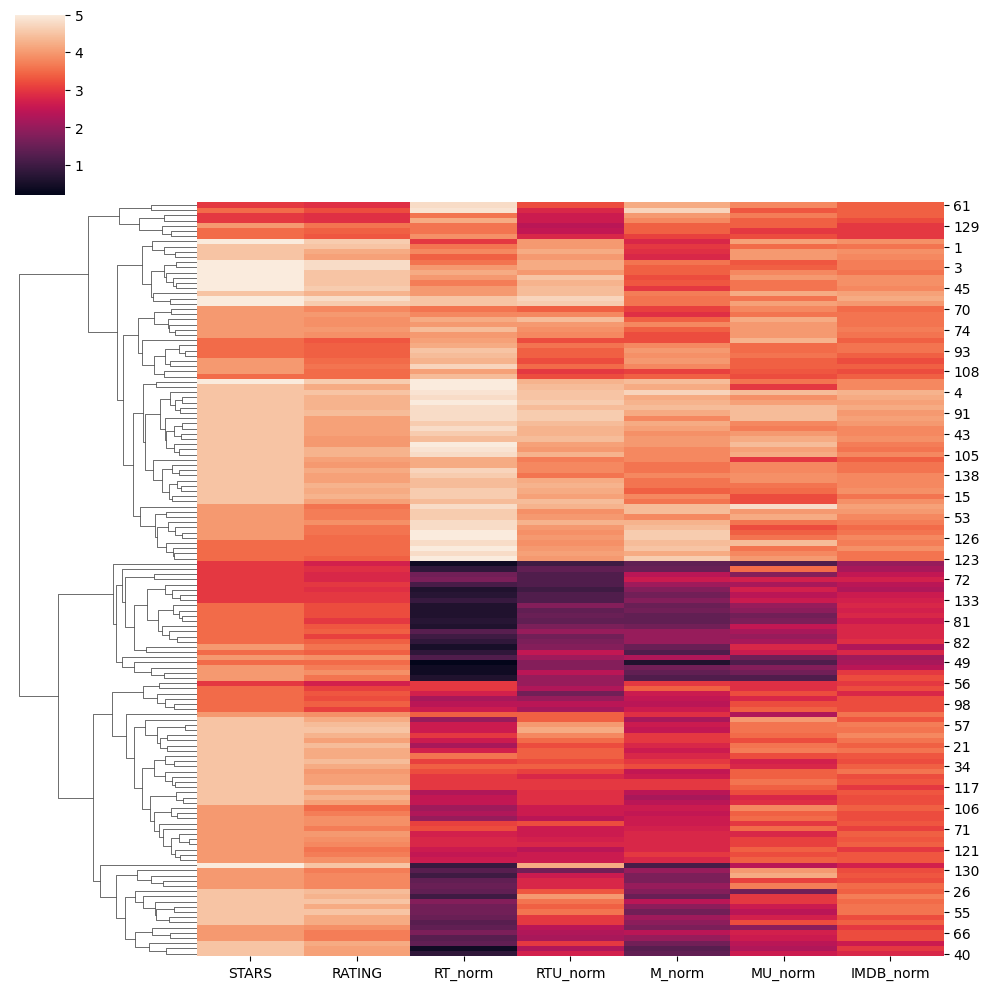

In [167]:
sns.clustermap(data=norm_scores, col_cluster=False)

In [170]:
norm_scores['FILM'] = union_df['FILM']
norm_scores.head()

<ipython-input-170-46b546ce1681>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norm_scores['FILM'] = union_df['FILM']


,STARS,RATING,RT_norm,RTU_norm,M_norm,MU_norm,IMDB_norm,FILM
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1,Fifty Shades of Grey (2015)
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6,Jurassic World (2015)
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7,American Sniper (2015)
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7,Furious 7 (2015)
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3,Inside Out (2015)


In [174]:
norm_scores.sort_values('RT_norm')[0:10]

,STARS,RATING,RT_norm,RTU_norm,M_norm,MU_norm,IMDB_norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
109,3.0,2.9,0.6,1.0,1.8,2.7,2.3,The Vatican Tapes (2015)
88,4.0,3.6,0.6,2.0,1.2,1.2,3.2,The Loft (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)


<Axes: ylabel='Density'>

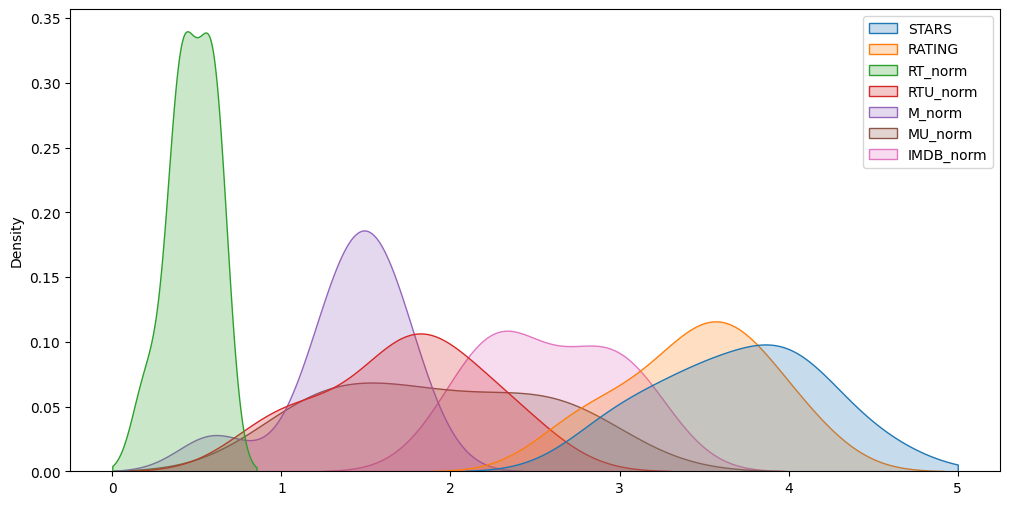

In [182]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=norm_scores.sort_values('RT_norm')[0:10],fill=True, clip=[0,5])